In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC

from sklearn.metrics import r2_score

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, MeanAbsoluteError
from keras.models import Sequential
from keras.layers import Dense 
from keras import backend as K
from keras.datasets import fashion_mnist

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 3s 1us/step


In [3]:
X_train.shape 

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

### Data Preprocessing

In [7]:
# Normalize and reeshape images 
X_train_final = X_train.reshape(-1, 28*28) / 255
X_test_final = X_test.reshape(-1, 28*28) / 255

In [8]:
X_train_final.shape

(60000, 784)

### Modelling

In [9]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss="SparseCategoricalCrossentropy", optimizer="Adam", metrics=["accuracy"])

In [11]:
result = model.fit(X_train_final, y_train, verbose=1, epochs=20, validation_data=(X_test_final, y_test))

Epoch 1/20
1875/1875 [==============================] - 104s 51ms/step - loss: 0.4690 - accuracy: 0.8307 - val_loss: 0.4274 - val_accuracy: 0.8449
Epoch 2/20
1875/1875 [==============================] - 77s 41ms/step - loss: 0.3574 - accuracy: 0.8683 - val_loss: 0.3862 - val_accuracy: 0.8641
Epoch 3/20
1875/1875 [==============================] - 60s 32ms/step - loss: 0.3221 - accuracy: 0.8817 - val_loss: 0.3630 - val_accuracy: 0.8663
Epoch 4/20
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2976 - accuracy: 0.8888 - val_loss: 0.3457 - val_accuracy: 0.8745
Epoch 5/20
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2789 - accuracy: 0.8963 - val_loss: 0.3419 - val_accuracy: 0.8760
Epoch 6/20
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2641 - accuracy: 0.9012 - val_loss: 0.3522 - val_accuracy: 0.8739
Epoch 7/20
1875/1875 [==============================] - 65s 34ms/step - loss: 0.2518 - accuracy: 0.9047 - val_loss: 0.3343 

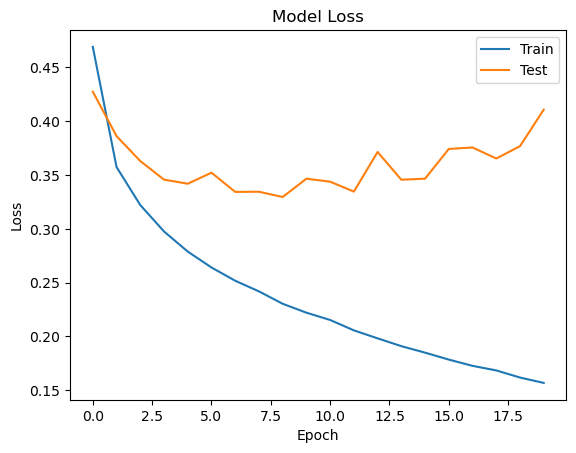

In [12]:
plt.plot(result.history["loss"])
plt.plot(result.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper right")
plt.show()

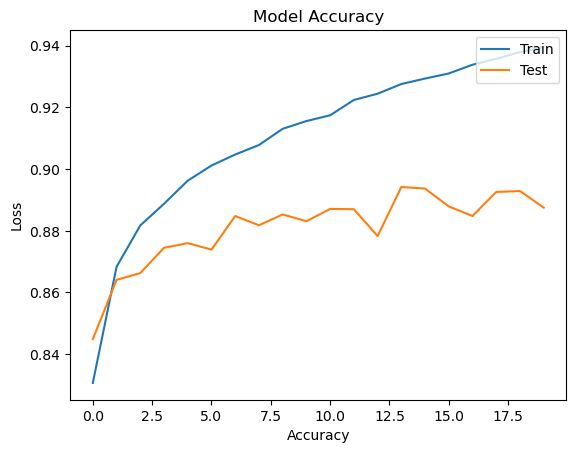

In [13]:
plt.plot(result.history["accuracy"])
plt.plot(result.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Loss")
plt.xlabel("Accuracy")
plt.legend(["Train", "Test"], loc="upper right")
plt.show()

In [15]:
model.save("fashion_mnist_classification_model.h5")

In [16]:
model.save_weights("fashion_mnist_classification_model_weights.h5")